In [41]:
# TODO

# * КОЛ-ВО СИМВОЛОВ В ТЕКСТЕ БЕЗ УЧЁТА ЗНАКОВ ПРЕПИНАНИЯ БЕБЕБЕ И МБ ПРОБЕЛОВ?????? тутуту

# ФУНКЦИЯ ДЛЯ ВЫСЧИТЫВАНИЯ ВСЯКИХ СТАТИСТИЧЕСКИХ ПРИБЛУД. В ОТДЕЛЬНОМ ФААААЙЛКИЕ

# Библиотеки и CUDA

In [2]:
import torch
print(torch.cuda.is_available())

False


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from datasets import load_dataset

In [7]:
import pandas as pd
import librosa
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tqdm import tqdm

# Модуль А. Анализ и предобработка данных 

## Структура исходных данных

*Исходные данные состоят из "***.csv" файла и аудиофайлов в формате ".wav".*

* В файле "***.csv" какие-то колонки, в них хранятся текст, название аудиофайла с соответствующим содержанием (индексация; в аудиофайле содержится произношение текста из таблицы)

* Файлы ".wav" - аудиофайлы, соответствующие текстам из .csv

____

** пс: датасет LJSpeech-1.1 сюда втсавлен чтобы посомтреть как с файлами работать, по факту потом будет дуругоййй

In [8]:
df_ljs = pd.read_csv(r'..\old\Module_A\LJSpeech-1.1\metadata.csv', sep = '|', header = None) # читаем файд csv
df_ljs # выводим

,0,1,2
0,LJ001-0001,"Printing, in the only sense with which we are ...","Printing, in the only sense with which we are ..."
1,LJ001-0002,in being comparatively modern.,in being comparatively modern.
2,LJ001-0003,For although the Chinese took impressions from...,For although the Chinese took impressions from...
3,LJ001-0004,"produced the block books, which were the immed...","produced the block books, which were the immed..."
4,LJ001-0005,the invention of movable metal letters in the ...,the invention of movable metal letters in the ...
...,...,...,...
13095,LJ050-0274,made certain recommendations which it believes...,made certain recommendations which it believes...
13096,LJ050-0275,materially improve upon the procedures in effe...,materially improve upon the procedures in effe...
13097,LJ050-0276,"As has been pointed out, the Commission has no...","As has been pointed out, the Commission has no..."
13098,LJ050-0277,with the active cooperation of the responsible...,with the active cooperation of the responsible...


In [9]:
df_ljs.columns = ['filename', 'text1', 'text2'] 

In [10]:
df_ljs

,filename,text1,text2
0,LJ001-0001,"Printing, in the only sense with which we are ...","Printing, in the only sense with which we are ..."
1,LJ001-0002,in being comparatively modern.,in being comparatively modern.
2,LJ001-0003,For although the Chinese took impressions from...,For although the Chinese took impressions from...
3,LJ001-0004,"produced the block books, which were the immed...","produced the block books, which were the immed..."
4,LJ001-0005,the invention of movable metal letters in the ...,the invention of movable metal letters in the ...
...,...,...,...
13095,LJ050-0274,made certain recommendations which it believes...,made certain recommendations which it believes...
13096,LJ050-0275,materially improve upon the procedures in effe...,materially improve upon the procedures in effe...
13097,LJ050-0276,"As has been pointed out, the Commission has no...","As has been pointed out, the Commission has no..."
13098,LJ050-0277,with the active cooperation of the responsible...,with the active cooperation of the responsible...


* три колонки: название файлы; текст с циферками; текст где циферки словами напсианы

In [11]:
ds = load_dataset('bond005/sberdevices_golos_10h_crowd', cache_dir = r'..\old\Module_A\data_sber')

In [12]:
ds

DatasetDict({
    train: Dataset({
        features: ['audio', 'transcription'],
        num_rows: 7993
    })
    validation: Dataset({
        features: ['audio', 'transcription'],
        num_rows: 793
    })
    test: Dataset({
        features: ['audio', 'transcription'],
        num_rows: 9994
    })
})

в датасете ds звук уже закодирован бе ме

In [13]:
dfs = pd.DataFrame(columns = ['audio', 'text'])

In [14]:
print(ds['test'][2]['transcription'])

заказать яблоки зеленые


In [15]:
auds = []
txt = []
count_word = []

for i in tqdm(range(len(ds['train'])), desc = 'Прогресс..', unit = 'sample'):
        auds.append((ds['train'][i]['audio']['array']))
        t = ds['train'][i]['transcription']
        txt.append(t)
        count_word.append(len(t.split()))

Прогресс..: 100%|██████████| 7993/7993 [00:24<00:00, 319.93sample/s]


In [16]:
dfs['audio'] = auds
dfs['text'] = txt
dfs['count_words'] = count_word

In [17]:
dfs

,audio,text,count_words
0,"[3.0517578125e-05, 3.0517578125e-05, 0.0, 0.0,...",шестнадцатая часть сезона пять сериала лемони ...,10
1,"[-3.0517578125e-05, 0.0, 0.0, -3.0517578125e-0...",три ангела на смотрешке,4
2,"[0.0, 0.0, 0.0, 0.0, 3.0517578125e-05, 3.05175...",цветущая парочка цветущие влюбленные восьмой с...,6
3,"[3.0517578125e-05, 0.0, 0.0, 0.0, -3.051757812...",афина алиса скажи баланс карты сбербанк,6
4,"[0.0098876953125, 0.010498046875, 0.0075073242...",фильмец стэнли кубрика борджиа,4
...,...,...,...
7988,"[0.0, 3.0517578125e-05, 3.0517578125e-05, 3.05...",найти кино пастырь,3
7989,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",какие музыканты играют в клубах,5
7990,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",джой включи килла инстинкт,4
7991,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",канал ювелирочка смотреть передачи включи,5


____

## Кодирование аудиофайлов

Для программного анализа я сразу закодирую аудиофайлы и сделаю под них отдельную колонку. Так же я сразу буду добавлять к данным частоту дискретизации аудио и длительность аудиофайлов.

* Закодированный звук будет храниться в виже numpy массивов

In [18]:
aud_array = []
srs = []
duractions = []


for i in range(len(df_ljs)):
    audiofile_path = f'../old/Module_A/LJSpeech-1.1/wavs/{df_ljs["filename"].iloc[i]}.wav'
    audio_array, sr = librosa.load(audiofile_path, sr = None)
    duraction = librosa.get_duration(y = audio_array, sr = sr)
    duractions.append(duraction)
    aud_array.append(audio_array)
    srs.append(sr)

In [19]:
df_ljs['duraction'] = duractions
df_ljs['sampling_rate'] = srs
df_ljs['array'] = aud_array

In [20]:
df_ljs

,filename,text1,text2,duraction,sampling_rate,array
0,LJ001-0001,"Printing, in the only sense with which we are ...","Printing, in the only sense with which we are ...",9.655011,22050,"[-0.0007324219, -0.00076293945, -0.00064086914..."
1,LJ001-0002,in being comparatively modern.,in being comparatively modern.,1.899546,22050,"[-0.0002746582, 0.0, 0.0, -9.1552734e-05, -0.0..."
2,LJ001-0003,For although the Chinese took impressions from...,For although the Chinese took impressions from...,9.666621,22050,"[-0.0024719238, -0.0037231445, 0.00045776367, ..."
3,LJ001-0004,"produced the block books, which were the immed...","produced the block books, which were the immed...",5.138730,22050,"[0.00024414062, 0.0, -0.00018310547, -0.000244..."
4,LJ001-0005,the invention of movable metal letters in the ...,the invention of movable metal letters in the ...,8.110884,22050,"[0.00036621094, 0.00045776367, 0.00036621094, ..."
...,...,...,...,...,...,...
13095,LJ050-0274,made certain recommendations which it believes...,made certain recommendations which it believes...,4.500181,22050,"[-0.00018310547, -0.00024414062, -0.0002441406..."
13096,LJ050-0275,materially improve upon the procedures in effe...,materially improve upon the procedures in effe...,9.120952,22050,"[9.1552734e-05, 0.0002746582, 0.00018310547, 0..."
13097,LJ050-0276,"As has been pointed out, the Commission has no...","As has been pointed out, the Commission has no...",8.563673,22050,"[0.0006713867, 0.0007324219, 0.0008544922, 0.0..."
13098,LJ050-0277,with the active cooperation of the responsible...,with the active cooperation of the responsible...,8.714603,22050,"[-0.0005493164, -0.0007019043, -0.0006713867, ..."


_____

## Математический анализ данных

* Сначала проанализируем текст (???)

In [21]:
dfs['count_words'].describe()

count    7993.000000
mean        4.962217
std         2.723737
min         1.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        26.000000
Name: count_words, dtype: float64

Среднее количество слов - 4.96 (~5)

Минимальное количество слов - 1, максимальное - 26 

* Визуализируем распределение значений:

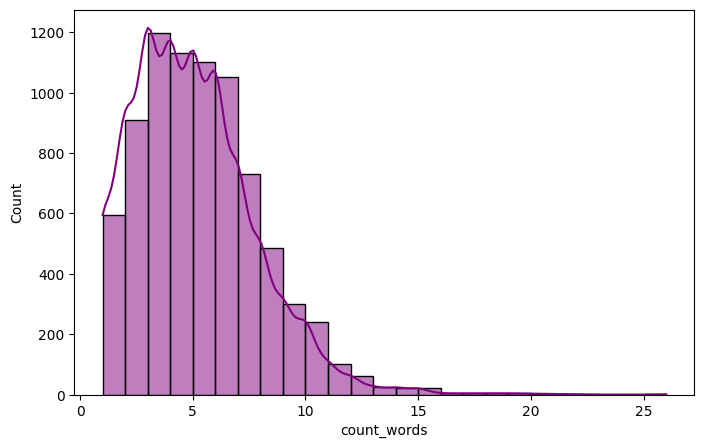

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(dfs['count_words'], kde = True, bins = 25, color = 'purple')
plt.show()

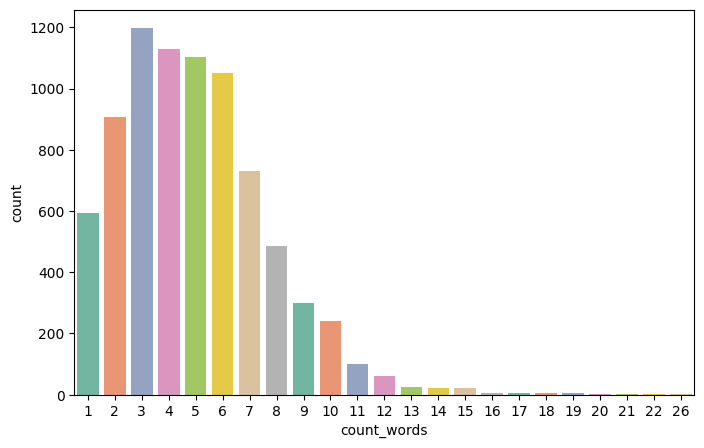

In [24]:
plt.figure(figsize=(8, 5))
sns.barplot(dfs['count_words'].value_counts(), palette = 'Set2')
plt.show()

* Далее оставляем те данные, где более 2ух слов

In [25]:
dfs = dfs[dfs['count_words'] > 2]
dfs

,audio,text,count_words
0,"[3.0517578125e-05, 3.0517578125e-05, 0.0, 0.0,...",шестнадцатая часть сезона пять сериала лемони ...,10
1,"[-3.0517578125e-05, 0.0, 0.0, -3.0517578125e-0...",три ангела на смотрешке,4
2,"[0.0, 0.0, 0.0, 0.0, 3.0517578125e-05, 3.05175...",цветущая парочка цветущие влюбленные восьмой с...,6
3,"[3.0517578125e-05, 0.0, 0.0, 0.0, -3.051757812...",афина алиса скажи баланс карты сбербанк,6
4,"[0.0098876953125, 0.010498046875, 0.0075073242...",фильмец стэнли кубрика борджиа,4
...,...,...,...
7988,"[0.0, 3.0517578125e-05, 3.0517578125e-05, 3.05...",найти кино пастырь,3
7989,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",какие музыканты играют в клубах,5
7990,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",джой включи килла инстинкт,4
7991,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",канал ювелирочка смотреть передачи включи,5


In [33]:
dfs['count_words'].describe()

count    6491.000000
mean        5.739177
std         2.422272
min         3.000000
25%         4.000000
50%         5.000000
75%         7.000000
max        26.000000
Name: count_words, dtype: float64

* 5-6 слов в среднем

* Смотрим на наибольшие значения в колонке:

In [37]:
dfs['count_words'].nlargest(15)

4645    26
7059    22
2095    21
3472    21
858     20
3827    20
7498    20
317     19
7106    19
7422    19
7931    19
1037    18
1442    18
1905    18
4815    18
Name: count_words, dtype: int64

Визуализируем; на графике отражает строки, в которых 15 и больше слов

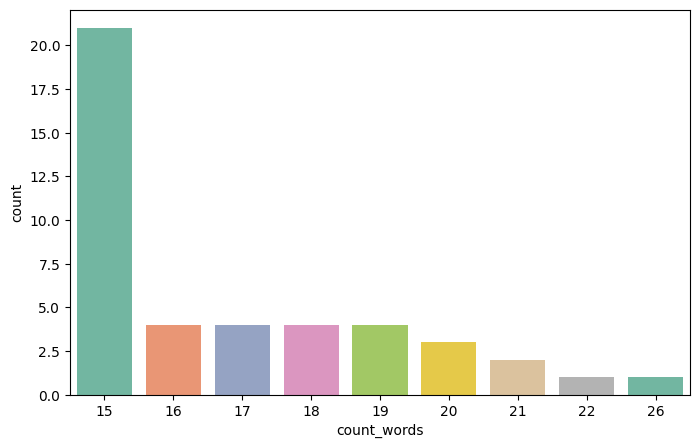

In [29]:
dfs_max = dfs[dfs['count_words'] > 14]

plt.figure(figsize=(8, 5))
sns.barplot(dfs_max['count_words'].value_counts(), palette = 'Set2')
plt.show()

In [ ]:
dfs_max['count_words'].value_counts()

count_words
15    21
19     4
17     4
18     4
16     4
20     3
21     2
26     1
22     1
Name: count, dtype: int64

* Среднее кол-во слов по всему датасету - 5 слов, максимальное - 26. Это не очень большая разница в рамках данной задачи, поэтому я не буду удалять 

_______


## Хз что именно; статистика математика анализ с модульными системами хз юез понятие 

пс: анализ звука

In [43]:
dfs

,audio,text,count_words
0,"[3.0517578125e-05, 3.0517578125e-05, 0.0, 0.0,...",шестнадцатая часть сезона пять сериала лемони ...,10
1,"[-3.0517578125e-05, 0.0, 0.0, -3.0517578125e-0...",три ангела на смотрешке,4
2,"[0.0, 0.0, 0.0, 0.0, 3.0517578125e-05, 3.05175...",цветущая парочка цветущие влюбленные восьмой с...,6
3,"[3.0517578125e-05, 0.0, 0.0, 0.0, -3.051757812...",афина алиса скажи баланс карты сбербанк,6
4,"[0.0098876953125, 0.010498046875, 0.0075073242...",фильмец стэнли кубрика борджиа,4
...,...,...,...
7988,"[0.0, 3.0517578125e-05, 3.0517578125e-05, 3.05...",найти кино пастырь,3
7989,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",какие музыканты играют в клубах,5
7990,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",джой включи килла инстинкт,4
7991,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",канал ювелирочка смотреть передачи включи,5


добавляем в дф длительность и частоту дискретизации

* частоту дискретизации везде указываем как 16000

In [45]:
duractions = [] 

for i in range(len(dfs)):
    duractions.append(librosa.get_duration(y = dfs['audio'].iloc[i], sr = 16000))

In [47]:
dfs['duraction'] = duractions
dfs['sr'] = 16000

dfs

,audio,text,count_words,duraction,sr
0,"[3.0517578125e-05, 3.0517578125e-05, 0.0, 0.0,...",шестнадцатая часть сезона пять сериала лемони ...,10,5.160000,16000
1,"[-3.0517578125e-05, 0.0, 0.0, -3.0517578125e-0...",три ангела на смотрешке,4,1.820000,16000
2,"[0.0, 0.0, 0.0, 0.0, 3.0517578125e-05, 3.05175...",цветущая парочка цветущие влюбленные восьмой с...,6,4.640000,16000
3,"[3.0517578125e-05, 0.0, 0.0, 0.0, -3.051757812...",афина алиса скажи баланс карты сбербанк,6,4.620375,16000
4,"[0.0098876953125, 0.010498046875, 0.0075073242...",фильмец стэнли кубрика борджиа,4,5.540000,16000
...,...,...,...,...,...
7988,"[0.0, 3.0517578125e-05, 3.0517578125e-05, 3.05...",найти кино пастырь,3,2.660000,16000
7989,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",какие музыканты играют в клубах,5,2.066187,16000
7990,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",джой включи килла инстинкт,4,4.272062,16000
7991,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",канал ювелирочка смотреть передачи включи,5,4.460000,16000
